Importing all the important modules which are required for model visualisation, pre-processing and model creation and testing as well.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

Importing the dataset from keras.datasets (MNIST dataset)

In [ ]:
from tensorflow.keras.datasets import mnist

Now, let's load the data for future use like visualisation and model creation...

mnist.load_data() will automatically divide the dataset into train and test data, where the ratio is 6:1.

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Checking if the data has any kind of NaN/ None values or not. And also checking that the data is precisely splitted into train and test as we needed.

In [ ]:
print("Checking for missing values...")
print(f"x_train shape: {x_train.shape}, y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}, y_test shape: {y_test.shape}")

print("Missing values in x_train:", np.isnan(x_train).sum())
print("Missing values in y_train:", np.isnan(y_train).sum())
print("Missing values in x_test:", np.isnan(x_test).sum())
print("Missing values in y_test:", np.isnan(y_test).sum())


Checking for missing values...
x_train shape: (60000, 28, 28), y_train shape: (60000,)
x_test shape: (10000, 28, 28), y_test shape: (10000,)
Missing values in x_train: 0
Missing values in y_train: 0
Missing values in x_test: 0
Missing values in y_test: 0


Now, checking if the inputs and the labels attached to them are correct or not. Basically checking if the data is correctly loaded or is there any kind of ambiquity.

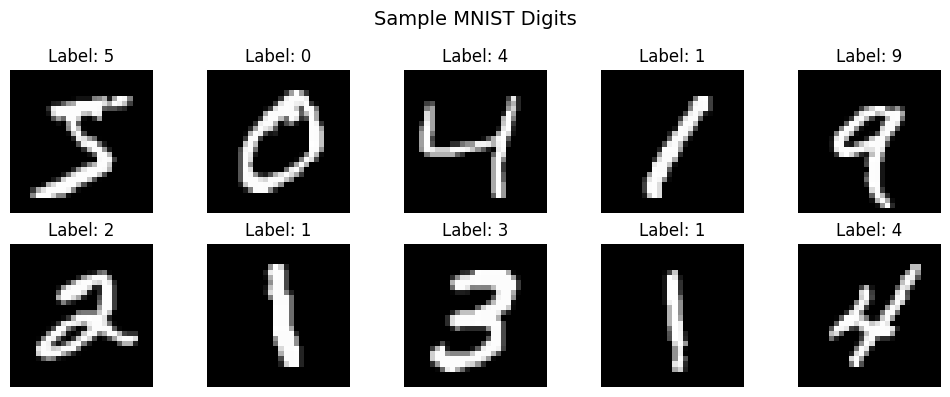

In [ ]:
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.suptitle("Sample MNIST Digits", fontsize=14)
plt.tight_layout()
plt.show()

Checking out the distirbution of the values from 0-9. This helps in understanding that the model is not just getting used to one value basically all the values are equally provided to train and test. This helps in creation of a better model.

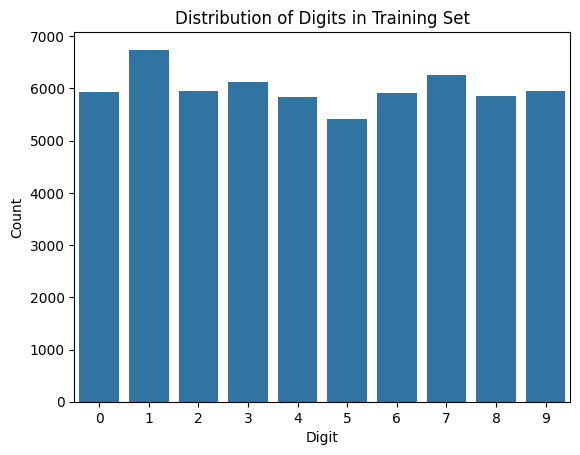

In [ ]:
sns.countplot(x=y_train)
plt.title("Distribution of Digits in Training Set")
plt.xlabel("Digit")
plt.ylabel("Count")
plt.show()

Now, let's normalize the data, so that the grayscale values are randing from 0 to 1 and not 0 to 255... This provides better understanding of the model.

In [ ]:
x_train = x_train / 255.0
x_test = x_test / 255.0

Now, let's build the model. In the below code I used Sequential Network and created the layers for the model. The first layer flattens the 28*28 images into vectors, so that they can be input as in the form of grayscale values as well. Then I created a hidden layer, which uses activation = 'relu' and has 128 neurons and then there is the last layer which will give the output for the numbers and hence has 10 neurons using activation 'softmax'...

In [ ]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Now, in the below code after creating the network, now I am compiling it to create a model with the optimizer as 'adam', loss as 'sparse_categorical_crossentropy' and then the metrics used is 'accuracy'... This is basically adding the important stuff before using the model.

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Now, I am training the model in the below code. I used epochs = 5 and validation_split = 0.1. Basically it will automatically save 0.1 for the validation stuff and epochs = 5 means that the data set/ data subset will be passed 5 times through the model for better understanding...

In [ ]:
history = model.fit(x_train, y_train, epochs=5, validation_split=0.1)

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8703 - loss: 0.4476 - val_accuracy: 0.9607 - val_loss: 0.1323
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9611 - loss: 0.1310 - val_accuracy: 0.9730 - val_loss: 0.0891
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9763 - loss: 0.0794 - val_accuracy: 0.9753 - val_loss: 0.0848
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9815 - loss: 0.0604 - val_accuracy: 0.9767 - val_loss: 0.0776
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9866 - loss: 0.0447 - val_accuracy: 0.9745 - val_loss: 0.0887


Now, after the training the model and getting an accuracy of 98% for the train model. Now, I chose to test it on the dataset that I first separated.. I got an accuracy of 97% which is closer to the train set's accuracy and hence their is no overflow as well... This means our model is working perfectly fine and can give an accuracy of around 97-98% on the new data.

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"\n✅ Final Test Accuracy: {test_accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9759 - loss: 0.0844

✅ Final Test Accuracy: 0.9768


  Now, in the below code I am just plotting the train and the validation accuracy and I got to know that yes this model is working perfectly fine and there is no overflow as well...

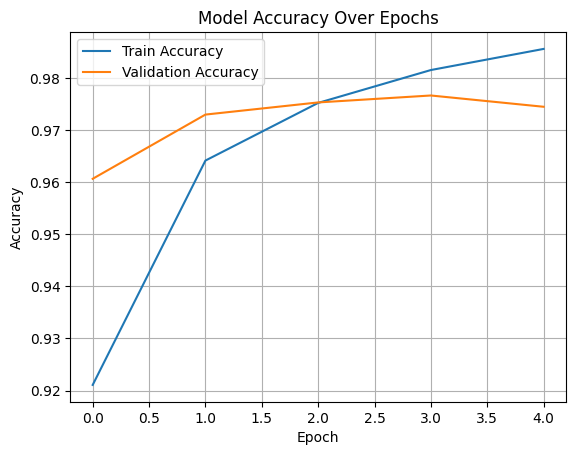

In [ ]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Model Accuracy Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()